In [92]:
import numpy as np
import scipy as sc
import sympy as sp
from sympy.solvers import solve
import matplotlib.pyplot as plt

In [61]:
M = np.array([[1, -1, 4],
               [3, 2, -1],
               [2, 1, -1]])
M

array([[ 1, -1,  4],
       [ 3,  2, -1],
       [ 2,  1, -1]])

In [62]:
#Definimos x simbólica para hallas eigenvalores de la Matrix M.
x = sp.symbols("x")

#Se define la matrix identidad por x para eigenvaores
N = np.array([[x,0,0], [0,x,0], [0,0,x]])
#Se halla la resta entre la mmatrix y la identidad por x y se imprime matrix resultante
A= M-N
A


array([[1 - x, -1, 4],
       [3, 2 - x, -1],
       [2, 1, -x - 1]], dtype=object)

In [63]:
#Calculando determinantes de una matriz cuadrada:
def detc(N):
  a = N[0,0] * N[1,1]
  b = N[1,0] * N[0,1]
  return a-b

#Se halla el determinante de la matix resultante, apoyandonos en la función para determinantes de 2x2.
P = - (A[0,0]*detc(A[1:3:1, 1:3:1]) - A[0,1]*detc(A[1:3:1, 0:3:2]) + A[0,2] * detc(A[1:3:1, 0:2:1]))
P

-5*x - (1 - x)*((2 - x)*(-x - 1) + 1) + 5

In [64]:
P = sp.simplify(P)
print("El poilinomio carácterístico hallado es: ", P)
print("El polinomio característico que nos arroja numpy es: ", np.poly(M))

El poilinomio carácterístico hallado es:  x**3 - 2*x**2 - 5*x + 6
El polinomio característico que nos arroja numpy es:  [ 1. -2. -5.  6.]


In [65]:
autovals = solve(P,x)
print('Los autovalores hallados manualmente son: ' , autovals)
print('Lo sautovalores que nos da la libreria de numpy son: ', np.linalg.eig(M)[0] )

Los autovalores hallados manualmente son:  [-2, 1, 3]
Lo sautovalores que nos da la libreria de numpy son:  [ 3. -2.  1.]


In [66]:
# Encontramos los autovectores para la matriz P:
N= np.zeros((len(M), len(M), len(M)))
B = np.zeros((len(M),len(M),len(M)))
for i in range(len(autovals)):
  A_n = lambda x: ([[x,0,0], [0,x,0], [0,0,x]])
  N[i] = (np.array(A_n(autovals[i])))
  B[i] = M - N[i]

# Hallamos la matriz de autovectores P:
P= np.zeros((len(M),len(M)))
for i in range(len(M)):
  L = sp.Matrix(B[i])
  x = L.nullspace()
  x= np.ravel(x)
  P[:,i] = x



In [67]:
#Hallamos la inversa de P:
P_inv = np.linalg.inv(P)
#Convertimos todo a matrices de sympy para mejorar cálculos:
p_inv = sp.Matrix(P_inv)
M =  sp.Matrix(M)
P = sp.Matrix(P)
#Hallamos y retornamos la matriz diagonal:
D = P_inv*M*P
D

Matrix([
[                 -2.0, 4.44089209850063e-16,                     0],
[-1.11022302462516e-16,                  1.0, -1.11022302462516e-16],
[                    0,                    0,                   3.0]])

# Actividad 2

In [68]:
A = np.matrix([[1, -2],
               [-2, 3]])
A

matrix([[ 1, -2],
        [-2,  3]])

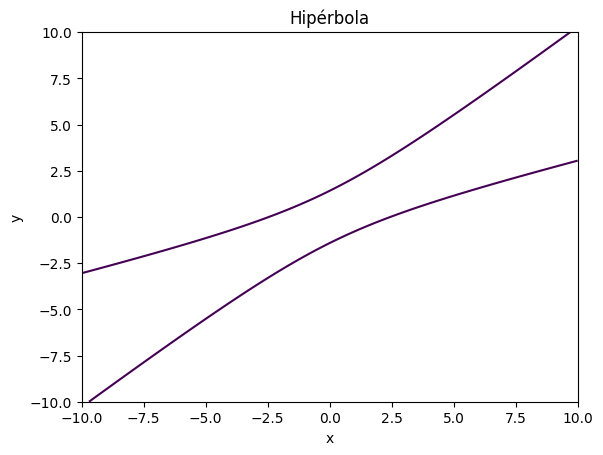

In [50]:
#Ecuación de la Hipérbola y grafica de la hipérbola:
# Definir los valores de x y y
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

# Crear una cuadrícula de coordenadas
X, Y = np.meshgrid(x, y)

# Definir la ecuación de la parábola
F = X**2 - 4*X*Y + 3*Y**2 - 6

# Graficar la parábola por medio de curva de nivel counter.
plt.contour(X, Y, F, levels=[0])

# Agregar etiquetas y título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hipérbola')
plt.show()




In [51]:
#Diagonalización de A:
A = np.matrix([[1, -2],
               [-2, 3]])
A

matrix([[ 1, -2],
        [-2,  3]])

In [52]:
#Encontramos la matriz Q de auto vectores:
Q = np.linalg.eig(A)[1]
print("La matriz de eigenvectores Q es: ")
print(Q)

#Encontramos la mattriz inversa de Q:
Q_inv = np.linalg.inv(Q)
print("La matriz inversa de Q es: ")
print(Q_inv)


La matriz de eigenvectores Q es: 
[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]
La matriz inversa de Q es: 
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [53]:
#Hallamos la matriz diagonal D:
D = Q_inv*A*Q
D.round(4)


array([[-0.2361, -0.    ],
       [-0.    ,  4.2361]])